# Capstone Regression Project

Pedro J. Salinas [pedrojsalinas@gmail.com](mailto:pedrojsalinas@gmail.com)

## Data Preparation

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

# from bs4 import BeautifulSoup
# import requests

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("../data/kc_house_data.csv")

### Data Exploration

In [3]:
df.shape

(30155, 25)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Cleaning

In [7]:
# Change `date` column name to `selldate`
rnmdate = {"date": "selldate"}
df.rename(columns=rnmdate, inplace=True)
df.head()

,id,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [8]:
# Change the format of the `selldate` column to a yyyy-mm-dd format
df["selldate"] = df["selldate"].apply(lambda x: pd.to_datetime(x, yearfirst=True))

In [9]:
df.dtypes

id                        int64
selldate         datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
dtype: object

In [10]:
df.head()

,id,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [11]:
# Create a new column `yr_old` that compute the number of years since a house was either renovated or sold
df["yr_old"] = np.where(
    df["yr_renovated"] != 0,
    df["selldate"].apply(lambda x: x.year) - df["yr_renovated"],
    df["selldate"].apply(lambda x: x.year) - df["yr_built"]
)

In [12]:
df.head()

,id,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9


In [13]:
# diplay of the information in `address` column
pd.set_option('max_colwidth', None)

In [14]:
# Let's check that all the addresses belongs to the King County Area
df['address'][0:5]

0        2102 Southeast 21st Court, Renton, Washington 98055, United States
1    11231 Greenwood Avenue North, Seattle, Washington 98133, United States
2         8504 South 113th Street, Seattle, Washington 98178, United States
3       4079 Letitia Avenue South, Seattle, Washington 98118, United States
4     2193 Northwest Talus Drive, Issaquah, Washington 98027, United States
Name: address, dtype: object

In [15]:
# Using the Capitol Impact Government Gateaway, 
# to find zip codes, and city names in King County
addresses = pd.read_html('https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033')

In [16]:
addresses

[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [17]:
# We're only interested in: `zipcode`, `city`, 
# and those are in elements: 2, 3, and 4
# let's concatenate those elements in dataframe
county_df = pd.concat([addresses[2], addresses[3], addresses[4]], ignore_index=True)

In [18]:
county_df

,Zip Code,City,County
0,98001,Algona,King County
1,98001,Auburn,King County
2,98001,Federal Way,King County
3,98002,Auburn,King County
4,98003,Auburn,King County
...,...,...,...
147,98198,Seatac,King County
148,98198,Seattle,King County
149,98199,Seattle,King County
150,98224,Baring,King County


In [19]:
county_df['City'].unique()

array(['Algona', 'Auburn', 'Federal Way', 'Beaux Arts Village',
       'Bellevue', 'Clyde Hill', 'Hunts Point', 'Yarrow Point',
       'Black Diamond', 'Bothell', 'Burton', 'Vashon', 'Carnation',
       'Duvall', 'Enumclaw', 'Fall City', 'Hobart', 'Issaquah', 'Kenmore',
       'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island',
       'Covington', 'North Bend', 'Pacific', 'Preston', 'Ravensdale',
       'Redmond', 'Redondo', 'Renton', 'Newcastle', 'Seahurst',
       'Snoqualmie', 'Snoqualmie Pass', 'Woodinville', 'Sammamish',
       'Seattle', 'Tukwila', 'Shoreline', 'Burien', 'Des Moines',
       'Normandy Park', 'Seatac', 'Lk Forest Park', 'Lk Forest Pk',
       'Lake Forest Park', 'Baring', 'Skykomish'], dtype=object)

In [20]:
to_replace = {'Lk Forest Park': 'Lake Forest Park', 'Lk Forest Pk': 'Lake Forest Park', 'Seatac': 'SeaTac'}
county_df.replace(to_replace, inplace=True)

In [21]:
county_df['City'].unique()

array(['Algona', 'Auburn', 'Federal Way', 'Beaux Arts Village',
       'Bellevue', 'Clyde Hill', 'Hunts Point', 'Yarrow Point',
       'Black Diamond', 'Bothell', 'Burton', 'Vashon', 'Carnation',
       'Duvall', 'Enumclaw', 'Fall City', 'Hobart', 'Issaquah', 'Kenmore',
       'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island',
       'Covington', 'North Bend', 'Pacific', 'Preston', 'Ravensdale',
       'Redmond', 'Redondo', 'Renton', 'Newcastle', 'Seahurst',
       'Snoqualmie', 'Snoqualmie Pass', 'Woodinville', 'Sammamish',
       'Seattle', 'Tukwila', 'Shoreline', 'Burien', 'Des Moines',
       'Normandy Park', 'SeaTac', 'Lake Forest Park', 'Baring',
       'Skykomish'], dtype=object)

In [22]:
def add_city(address):
    for city in county_df['City'].unique():
        if city in address:
            return city

In [23]:
df['city'] = df['address'].apply(add_city)

In [24]:
df.isna().sum()

id                 0
selldate           0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
greenbelt          0
nuisance           0
view               0
condition          0
grade              0
heat_source       32
sewer_system      14
sqft_above         0
sqft_basement      0
sqft_garage        0
sqft_patio         0
yr_built           0
yr_renovated       0
address            0
lat                0
long               0
yr_old             0
city             931
dtype: int64

In [25]:
# There are 931 cities that did not match the criteria, and
# few `heat_source`, and `sewer_system` missing.
# Remove those entries
df.dropna(how='any', axis=0, inplace=True)

In [26]:
df.isna().sum()

id               0
selldate         0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
yr_old           0
city             0
dtype: int64

In [27]:
df.shape

(29183, 27)

In [28]:
# Find duplicate rows
duplicateRows = df[df.duplicated()]
duplicateRows

,id,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old,city
4846,1233100736,2021-09-28,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washington 98033, United States",47.68069,-122.172135,2,Kirkland


In [29]:
df[df["id"] == 1233100736]

,id,selldate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,yr_old,city
4845,1233100736,2021-09-28,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washington 98033, United States",47.68069,-122.172135,2,Kirkland
4846,1233100736,2021-09-28,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washington 98033, United States",47.68069,-122.172135,2,Kirkland


In [30]:
df.drop_duplicates(keep="first", inplace=True)

In [31]:
# Column `id` is not relevant for the analysis
df = df.drop(labels='id', axis=1)

In [32]:
df.shape

(29182, 26)

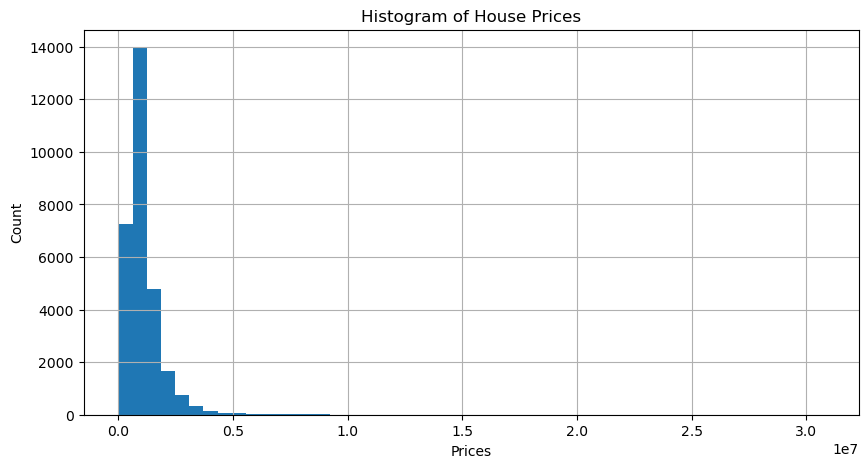

In [33]:
# Histogram of House Price
plt.figure(figsize=(10,5))
ax = df['price'].hist(bins=50)

ax.set_title('Histogram of House Prices')
ax.set_xlabel('Prices')
ax.set_ylabel('Count')

plt.savefig('../images/histogram_house_prices.png')

plt.show()

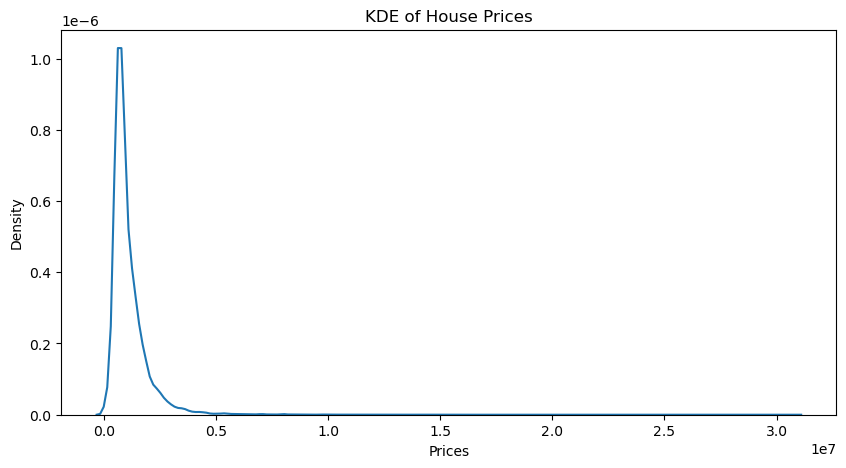

In [34]:
plt.figure(figsize=(10,5))
kde = sns.kdeplot(data=df, x=df['price'])

kde.set_title('KDE of House Prices')
kde.set_xlabel('Prices')

plt.savefig('../images/kde_of_house_prices')

plt.show();

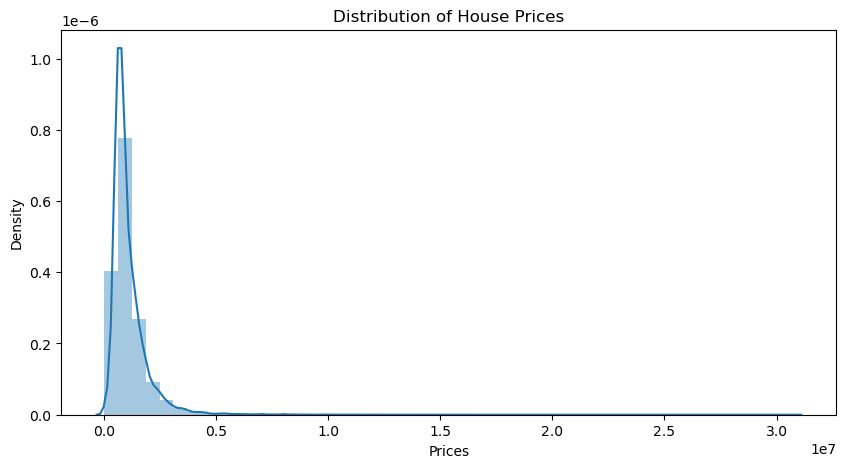

In [35]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df["price"])

ax.set_title('Distribution of House Prices')
ax.set_xlabel('Prices')

plt.savefig('../images/distribution_of_house_prices')

plt.show();

In [36]:
# Save dataframe for next step `Modeling`
df.to_csv('../data/01_eda.csv', index=False)